In [3]:
pip install matplotlib

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from math import sqrt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input

In [74]:
train = pd.read_csv("test.csv")
test1 = pd.read_csv("test.csv")

In [75]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
train.shape

(28000, 784)

In [77]:
test1.shape

(28000, 784)

In [78]:
width = height = int(sqrt(train.shape[1]))
total = train.shape[0]

In [79]:
X_train = train.to_numpy()
X_train = np.resize(X_train, (total, width, height))

In [80]:
X_train.shape

(28000, 28, 28)

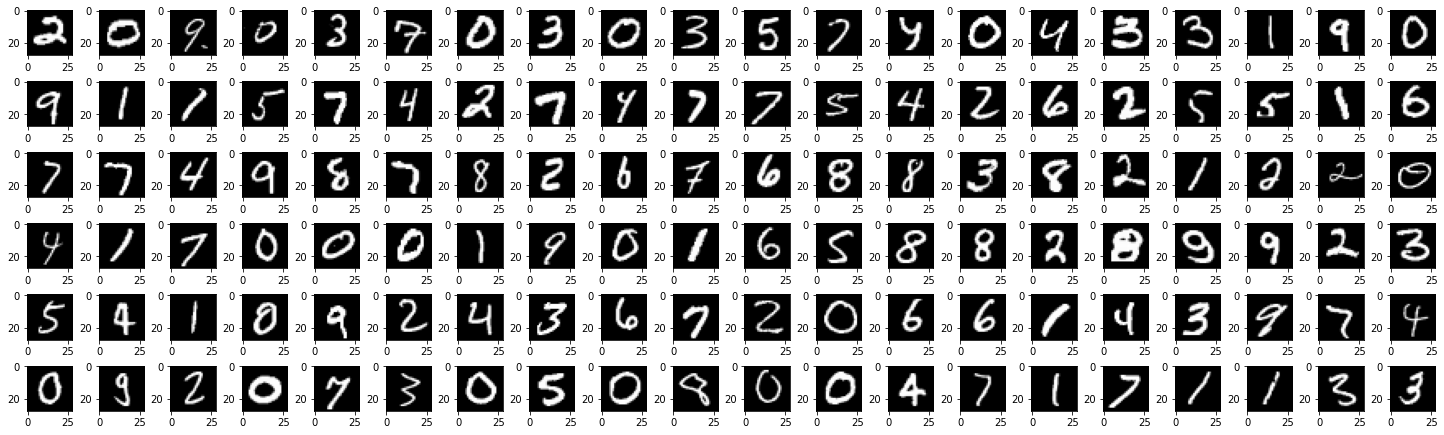

In [81]:
rows, cols = 6, 20
fig, axs = plt.subplots(rows, cols, figsize=(20, 6))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(X_train[cols*i+j], cmap='gray')
fig.tight_layout(pad = 0.5)
plt.show()

In [82]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [83]:
x_train = np.array(x_train, dtype=np.float16)
x_train = np.resize(x_train, (* x_train.shape[:3], 1))

In [84]:
x_train.shape

(60000, 28, 28, 1)

In [85]:
model = keras.Sequential([Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                         MaxPooling2D((2, 2)),
                         Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                         MaxPooling2D((2, 2)),
                         Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                         MaxPooling2D((2, 2)),
                         Flatten(),
                         Dropout(0.2),
                         Dense(128, activation='relu'),
                         Dropout(0.2),
                         Dense(10, activation='softmax')
                         ])

In [86]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [87]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [88]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10, min_delta = 0.0001, restore_best_weights = True)

In [89]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, callbacks = early_stopping)

Epoch 1/100
1500/1500 [==============================] - 57s 37ms/step - loss: 1.1560 - accuracy: 0.8171 - val_loss: 0.0585 - val_accuracy: 0.9822 - loss: 13.3415 - accuracy:  - ETA: 57s - loss: 12.1968 - accu - ETA: 55s - loss: 10.5066 - accuracy: - ETA: 55s - loss: 9.6693 - accur - ETA: 53s - loss: 8.0324 - accuracy: 0.31 - ETA: 53s - loss: 7.8045 - accuracy: 0.32 - ETA: 52s - loss: 7.5920 - accuracy: 0 - ETA: 52s - loss: 7.1624 - - ETA: 54s - loss: 6.1647 - accuracy: 0. - ETA: 54s - loss: 5.9862 - accuracy: 0.4 - ETA: 55s - loss: 5.8740 - accur - ETA: 54s - loss: 5.3587 - accurac - ETA: 53s - loss: 4.9952 - accuracy: 0.46 - ETA: 52s - loss: 4.9402 - accuracy: 0. - ETA: 52s - loss: 4.8005 - accur - ETA: 51s - loss: 4.4606 - accuracy: 0. - ETA: 50s - loss: 4.3509 - accuracy: 0 - ETA: 50s - loss: 4.2225 - accuracy: - ETA: 49s - loss: 4.0573 - accuracy: 0.53 - ETA: 49s - loss: 4.0130 - accuracy: 0 - ETA: 48s - loss: 3.9073 - accuracy: 0.5 - ETA: 48s - loss: 3.8470 - accuracy: 0.551 - ET

1244/1500 [=======================>......] - ETA: 7s - loss: 0.0621 - accuracy: 0.98167- ETA: 43s - loss: 0.0601 - accuracy: 0.9 - ETA: 44s - loss: 0.0583 - accuracy: 0.97 - ETA: 44s - loss: 0.0561 - accuracy: 0.975 - ETA: 45s - loss: 0.0548 - accuracy: 0. - ETA: 46s - loss: 0.0539 - accuracy: 0.97 - ETA: 46s - loss: 0.0536 - accuracy: 0.977 - ETA: 46s - loss: 0.0537 - accuracy: 0.977 - ETA: 46s - loss: 0.0537 - accuracy:  - ETA: 46s - loss: 0.0539 - accuracy: 0.978 - ETA: 47s - loss: 0.0538 - accuracy: 0.978 - ETA: 47s - loss: 0.0538 - accuracy: 0.978 - ETA: 47s - loss: 0.0536 - accuracy: 0.97 - ETA: 47s - loss: 0.0537 - accuracy: 0.978 - ETA: 46s - loss: 0.0537 - accuracy: 0.978 - ETA: 46s - loss: 0.0538 - accuracy: 0.978 - ETA: 46s - loss: 0.0538 - accuracy: 0.979 - ETA: 46s - loss: 0.0538 - accuracy: 0.97 - ETA: 46s - loss: 0.0539 - accuracy: 0.979 - ETA: 46s - loss: 0.0539 - accuracy: 0.9 - ETA: 45s - loss: 0.0540 - accu - ETA: 43s - loss: 0.0536 - accuracy: 0. - ETA: 43s - loss: 

1500/1500 [==============================] - 44s 29ms/step - loss: 0.0631 - accuracy: 0.9814 - val_loss: 0.0542 - val_accuracy: 0.9851 - loss: 0.0622 - accuracy: 0. - ETA: 6s - loss: 0.0622 - accuracy:  - ETA: 6s - loss: 0.0623 - accuracy: 0.98 - ETA: 6s - loss: 0.0623 - accuracy - ETA: 6s - loss: 0.0623 - ac - ETA: 5s - loss: 0.0624 - accuracy:  - ETA: 5s - loss: 0.0624 - accuracy:  - ETA: 5s - loss: 0.0624 - accuracy: 0. - ETA: 5s - loss: 0.0625 - accuracy:  - ETA: 4s - loss: 0.0625 - accuracy: 0.98 - ETA: 4s - loss: 0.0625 - accuracy: 0. - ETA: 4s - loss: 0.0625 -  - ETA: 4s - loss: 0.0626 - accuracy: 0.98 - ETA: 4s - loss: 0.0626 - accuracy: 0. - ETA: 3s - loss: 0.0626 - accuracy:  - ETA: 3s - loss: 0.0626 - accuracy: 0. - ETA: 3s - loss: 0.0626 -  - ETA: 3s - loss: 0.0627 - accuracy: 0. - ETA: 3s - loss: 0.0627 - accuracy:  - ETA: 2s - loss: 0.0627 - accuracy: 0.98 - ETA: 2s - loss: 0.0627 - accuracy - ETA: 2s - loss: 0.0628 - accuracy - ETA: 2s - loss: 0.0628 - accuracy - ETA: 2s

1234/1500 [=======================>......] - ETA: 7s - loss: 0.0556 - accuracy: 0.9827 - ETA: 36s - loss: 0.0639 - accuracy: 0.976 - ETA: 37s - loss: 0.0628 - accuracy: 0.977 - ETA: 37s - loss: 0.0624 - accuracy: 0.97 - ETA: 37s - loss: 0.0601 - accuracy - ETA: 42s - loss: 0.0596 - accuracy: 0.98 - ETA: 42s - loss: 0.0597 - accuracy: 0.98 - ETA: 43s - loss: 0.0595 - accuracy: 0.98 - ETA: 43s - loss: 0.0593 - accuracy: 0.98 - ETA: 43s - loss: 0.0592 - accuracy: 0 - ETA: 44s - loss: 0.0587 - accuracy: 0. - ETA: 43s - loss: 0.0583 - accuracy: 0.97 - ETA: 43s - loss: 0.0580 - accuracy: 0. - ETA: 41s - loss: 0.0573 - accuracy: 0.97 - ETA: 40s - loss: 0.0572 - accuracy: 0.97 - ETA: 40s - loss: 0.0571 - accuracy: 0.97 - ETA: 40s - loss: 0.0571 - accuracy: 0.980 - ETA: 40s - loss: 0.0570 - accuracy: 0.980 - ETA: 40s - loss: 0.0569 - accuracy: 0.98 - ETA: 40s - loss: 0.0568 - accuracy: 0.980 - ETA: 40s - loss: 0.0568 - accuracy: 0.980 - ETA: 40s - loss: 0.0567 - accuracy:  - ETA: 39s - loss: 0.

1140/1500 [=====================>........] - ETA: 8s - loss: 0.0480 - accuracy: 0.98400- ETA: 32s - loss: 0.0453 - accuracy: 0.98 - ETA: 32s - loss: 0.0417 - accuracy: 0 - ETA: 32s - loss: 0.0416 - accuracy: 0.986 - ETA: 32s - loss: 0.0415 - accuracy: 0.986 - ETA: 32s - loss: 0.0414 - accuracy: 0.986 - ETA: 32s - loss: 0.0416 - accuracy: 0.985 - ETA: 32s - loss: 0.0420 - accuracy: 0.9 - ETA: 32s - loss: 0.0447 - accuracy: 0.98 - ETA: 32s - loss: 0.0463 - accuracy: 0.984 - ETA: 32s - loss: 0.0469 - accuracy: 0.984 - ETA: 32s - loss: 0.0474 - accuracy: 0.984 - ETA: 32s - loss: 0.0477 - accuracy: 0.983 - ETA: 32s - loss: 0.0481 - accuracy: 0.98 - ETA: 32s - loss: 0.0487 - accuracy: 0.98 - ETA: 32s - loss: 0.0493 - accuracy: 0.9 - ETA: 31s - loss: 0.0499 - accuracy: 0.98 - ETA: 31s - loss: 0.0500 - accuracy: 0.982 - ETA: 31s - loss: 0.0501 - accuracy: 0. - ETA: 31s - loss: 0.0501 - accuracy: 0.98 - ETA: 31s - loss: 0.0501 - accuracy: 0.982 - ETA: 31s - loss: 0.0500 - accuracy: 0.982 - ETA:

1500/1500 [==============================] - 38s 25ms/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.0502 - val_accuracy: 0.9876 - loss: 0.0481 - accuracy - ETA: 8s - loss: 0.0481 - accuracy: 0. - ETA: 8s - loss: 0.0481 - accu - ETA: 7s - loss: 0.0481 - accuracy - ETA: 7s - loss: 0.0482 - accuracy: 0. - ETA: 7s - loss: - ETA: 6s - loss: 0.0483 - accuracy: 0.98 - ETA: 6s - loss: 0.0483 - accuracy: 0. - ETA: 6s - loss: 0.0483 - accuracy: 0.98 - ETA: 6s - loss: 0.0483 - accuracy: 0. - ETA: 6s - loss: 0.0483 - accuracy:  - ETA: 6s - loss: 0.0483 - accuracy: 0. - ETA: 6s - loss: 0.0483 - accuracy: 0.98 - ETA: 5s - loss: 0.0484 - accuracy: 0.98 - ETA: 5s - loss: 0.0484 - accuracy - ETA: 5s - loss: 0.0484 - accuracy:  - ETA: 5s - loss: 0.0484 - accuracy: 0.98 - ETA: 5s - loss: 0.0484 - accuracy:  - ETA: 5s - loss: 0.0485 - accuracy: 0.98 - ETA: 5s - loss: 0.0485 - accuracy: 0.98 - ETA: 4s - loss: 0.0485 - accuracy: 0. - ETA: 4s - loss: 0.0485 - accuracy: 0.98 - ETA: 4s - loss: 0.0485 - 

1213/1500 [=======================>......] - ETA: 7s - loss: 0.0411 - accuracy: 0.98768- ETA: 36s - loss: 0.0083 - accuracy: 0 - ETA: 36s - loss: 0.0212 - accuracy: 0.9 - ETA: 36s - loss: 0.0240 - accuracy: 0.991 - ETA: 36s - loss: 0.0245 - accuracy: 0. - ETA: 35s - loss: 0.0256 - accuracy: 0.991 - ETA: 34s - loss: 0.0257 - accuracy: 0.991 - ETA: 34s - loss: 0.0257 - accuracy: 0.991 - ETA: 34s - loss: 0.0257 - accuracy: 0.991 - ETA: 34s - loss: 0.0256 - accuracy: 0.9 - ETA: 34s - loss: 0.0256 - accuracy: 0.99 - ETA: 33s - loss: 0.0257 - accuracy: 0.991 - ETA: 33s - loss: 0.0256 - accuracy: 0.991 - ETA: 33s - loss: 0.0256 - accuracy: 0.99 - ETA: 33s - loss: 0.0256 - accuracy: 0 - ETA: 32s - loss: 0.0255 - accuracy: 0.99 - ETA: 32s - loss: 0.0256 - accuracy: 0.991 - ETA: 32s - loss: 0.0257 - accuracy: 0.99 - ETA: 32s - loss: 0.0259 - accuracy: 0.991 - ETA: 32s - loss: 0.0261 - - ETA: 32s - loss: 0.0274 - accuracy: 0. - ETA: 32s - loss: 0.0276 - accuracy: 0.9 - ETA: 32s - loss: 0.0278 - a

1365/1500 [==========================>...] - ETA: 3s - loss: 0.0430 - accuracy: 0.9878 - ETA: 33s - loss: 0.0352 - accuracy: 0.986 - ETA: 33s - loss: 0.0345 - accuracy: 0.987 - ETA: 33s - loss: 0.0342 - accuracy: 0.988 - ETA: 33s - loss: 0.0350 - accuracy: 0.988 - ETA: 33s - loss: 0.0357 - accuracy: 0.98 - ETA: 33s - loss: 0.0369 - accuracy: 0. - ETA: 33s - loss: 0.0383 - accuracy: 0.98 - ETA: 32s - loss: 0.0382 - accuracy: 0.98 - ETA: 33s - loss: 0.0380 - accuracy: 0. - ETA: 34s - loss: 0.0383 - accuracy: 0.9 - ETA: 35s - loss: 0.0387 - accuracy: 0.990 - ETA: 35s - loss: 0.0388 - accur - ETA: 35s - loss: 0.0404 - accuracy: 0.9 - ETA: 35s - loss: 0.0407 - accuracy: 0.9 - ETA: 34s - loss: 0.0409 - accuracy: 0.990 - ETA: 34s - loss: 0.0410 - accuracy: 0.990 - ETA: 34s - loss: 0.0411 - accuracy: 0.990 - ETA: 34s - loss: 0.0411 - accuracy: 0.990 - ETA: 34s - loss: 0.0411 - accuracy: 0.990 - ETA: 34s - loss: 0.0411 - accuracy: 0.990 - ETA: 34s - loss: 0.0411 - accuracy: 0. - ETA: 33s - loss

1500/1500 [==============================] - 42s 28ms/step - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.0459 - val_accuracy: 0.98833s - loss: 0.0431 - accuracy - ETA: 2s - loss: 0.0431 - accuracy: 0. - ETA: 2s - loss: 0.0431 - accuracy: 0.98 - ETA: 2s - loss: 0.0431 - accuracy: 0.98 - ETA: 2s - loss: 0.0431 - accuracy:  - ETA: 2s - loss: 0.0431 - accuracy - ETA: 2s - loss: 0.0431 - accuracy: 0. - ETA: 2s - loss: 0.0431 - accuracy: 0.98 - ETA: 2s - loss: 0.0431 -  - ETA: 1s - loss: 0.0432 - accuracy: 0. - ETA: 1s - loss: 0.0432 - accuracy: 0. - ETA: 1s - loss: 0.0432 - accuracy:  - ETA: 1s - loss: 0.0432 - accuracy: 0. - ETA: 1s - loss: 0.0432 - accuracy: 0. - ETA: 1s - loss: 0.0432 - accuracy: 0. - ETA: 1s - loss: 0.0432 - ac - ETA: 0s - loss: 0.0433 -  - ETA: 0s - loss: 0.0433 - accuracy: 
Epoch 8/100


1219/1500 [=======================>......] - ETA: 7s - loss: 0.0389 - accuracy: 0.98855- ETA: 39s - loss: 0.0527 - accuracy: 0.97 - ETA: 36s - loss: 0.0516 - accuracy: 0.978 - ETA: 36s - loss: 0.0520 - accuracy: 0.97 - ETA: 35s - loss: 0.0497 - accuracy: 0.980 - ETA: 35s - loss: 0.0489 - accuracy: 0.98 - ETA: 36s - loss: 0.0469 - accuracy: 0.982 - ETA: 36s - loss: 0.0462 - accuracy: 0.982 - ETA: 35s - loss: 0.0456 - accuracy: 0.9 - ETA: 36s - loss: 0.0443 - accuracy: 0.98 - ETA: 35s - loss: 0.0432 - accuracy: 0.9 - ETA: 35s - loss: 0.0416 - accuracy: 0 - ETA: 34s - loss: 0.0392 - accuracy: 0 - ETA: 34s - loss: 0.0376 - - ETA: 35s - loss: 0.0362 - accuracy: 0.987 - ETA: 35s - loss: 0.0361 - acc - ETA: 34s - loss: 0.0361 - accuracy: 0.9 - ETA: 33s - loss: 0.0361 - accuracy: 0.9 - ETA: 33s - loss: 0.0360 - accuracy: 0.98 - ETA: 33s - loss: 0.0360 - accuracy: 0.988 - ETA: 33s - loss: 0.0360 - accuracy: 0. - ETA: 32s - loss: 0.0360 - accuracy: 0.988 - ETA: 32s - loss: 0.0359 - accuracy: 0.9

1164/1500 [======================>.......] - ETA: 8s - loss: 0.0341 - accuracy: 0.98999- ETA: 41s - loss: 0.0160 - accura - ETA: 39s - loss: 0.0301 - accuracy: 0.9 - ETA: 38s - loss: 0.0327 - accuracy:  - ETA: 36s - loss: 0.0364 - accuracy: 0.990 - ETA: 36s - loss: 0.0370 - accuracy: 0.9 - ETA: 35s - loss: 0.0378 - accuracy: 0.99 - ETA: 35s - loss: 0.0380 - accuracy: 0.989 - ETA: 34s - loss: 0.0380 - accuracy: 0.989 - ETA: 34s - loss: 0.0380 - accuracy: 0.9 - ETA: 34s - loss: 0.0379 - accuracy: 0.989 - ETA: 34s - loss: 0.0379 - accuracy: 0.9 - ETA: 34s - loss: 0.0376 - accuracy: 0.989 - ETA: 33s - loss: 0.0374 - accuracy: 0.989 - ETA: 33s - loss: 0.0373 - accuracy: 0.989 - ETA: 33s - loss: 0.0372 - accuracy: 0.98 - ETA: 33s - loss: 0.0370 - accuracy: 0. - ETA: 33s - loss: 0.0366 - accuracy: 0.9 - ETA: 32s - loss: 0.0363 - accuracy: 0.990 - ETA: 32s - loss: 0.0362 - accuracy: 0.990 - ETA: 32s - loss: 0.0362 - accuracy: 0.9 - ETA: 32s - loss: 0.0358 - accuracy: 0.990 - ETA: 32s - loss: 0

1500/1500 [==============================] - 38s 25ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0569 - val_accuracy: 0.9852oss: 0.0341 - accuracy: 0.98 - ETA: 7s - loss: 0.0341 - accuracy: 0.98 - ETA: 7s - loss: 0.0341 - accuracy: 0.98 - ETA: 7s - loss: 0.0341 - accuracy: 0.98 - ETA: 7s - loss: 0.0341 - accuracy: 0.98 - ETA: 7s - loss: 0.0342 - accuracy: 0.98 - ETA: 7s - loss: 0.0342 - accuracy:  - ETA: 7s - loss: 0.0342 - accuracy:  - ETA: 7s - loss: 0.0342 - accuracy:  - ETA: 6s - loss: 0.0342 - accuracy: 0.98 - ETA: 6s - loss: 0.0342 - accuracy: 0. - ETA: 6s - loss: 0.0342 - accuracy - ETA: 6s - loss: 0.0343 - accuracy: 0.98 - ETA: 6s - loss: 0.0343 - accuracy:  - ETA: 6s - loss: 0.0343 - accuracy:  - ETA: 6s - loss: 0.0343 - accuracy: 0. - ETA: 5s - loss: 0.0343 - accuracy: 0.98 - ETA: 5s - loss: 0.0343 - accuracy:  - ETA: 5s - loss: 0.0343 - accuracy: 0.98 - ETA: 5s - loss: 0.0343 - accuracy: 0.98 - ETA: 5s - loss: 0.0344 -  - ETA: 5s - loss: 0.0344 - accuracy: 0. - ETA

1009/1500 [===================>..........] - ETA: 11s - loss: 0.0302 - accuracy: 0.9909- ETA: 29s - loss: 0.0088 - accuracy: 0.99 - ETA: 29s - loss: 0.0113 - accuracy: 0.9 - ETA: 30s - loss: 0.0167 - accuracy: 0.995 - ETA: 30s - loss: 0.0180 - accuracy: 0.995 - ETA: 29s - loss: 0.0190 - accuracy: 0.99 - ETA: 29s - loss: 0.0214 - accuracy: 0.994 - ETA: 29s - loss: 0.0222 - accuracy: 0.99 - ETA: 29s - loss: 0.0233 - accuracy: 0.99 - ETA: 29s - loss: 0.0244 - accuracy: 0.99 - ETA: 29s - loss: 0.0253 - accuracy: 0.99 - ETA: 29s - loss: 0.0262 - accuracy: 0.992 - ETA: 29s - loss: 0.0266 - accuracy: 0.992 - ETA: 29s - loss: 0.0270 - accuracy: 0.992 - ETA: 29s - loss: 0.0273 - accuracy: 0.992 - ETA: 28s - loss: 0.0275 - accuracy: 0.992 - ETA: 28s - loss: 0.0277 - accuracy: 0.99 - ETA: 28s - loss: 0.0280 - accuracy: 0. - ETA: 28s - loss: 0.0281 - accuracy: 0.991 - ETA: 28s - loss: 0.0281 - accuracy: 0.991 - ETA: 28s - loss: 0.0281 - accuracy: 0.991 - ETA: 28s - loss: 0.0280 - accuracy: 0.991 -

1500/1500 [==============================] - 61s 41ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0378 - val_accuracy: 0.9917TA: 33s - loss: 0.0326 - accuracy: 0.9 - ETA: 33s - loss: 0.0357 - accuracy: 0.987 - ETA: 32s - loss: 0.0357 - accuracy: 0. - ETA: 32s - loss: 0.0373 - accuracy: 0.987 - ETA: 32s - loss: 0.0378 - accuracy: 0.987 - ETA: 31s - loss: 0.0389 - accuracy: 0.98 - ETA: 31s - loss: 0.0403 - accuracy: 0.987 - ETA: 31s - loss: 0.0407 - accuracy: 0.987 - ETA: 31s - loss: 0.0410 - accuracy: 0.987 - ETA: 31s - loss: 0.0413 - accuracy: 0.987 - ETA: 31s - loss: 0.0416 - accuracy: 0.987 - ETA: 31s - loss: 0.0417 - accuracy: 0.987 - ETA: 31s - loss: 0.0419 - accuracy: 0.987 - ETA: 31s - loss: 0.0420 - accuracy: 0. - ETA: 31s - loss: 0.0423 - accuracy: 0.987 - ETA: 31s - loss: 0.0424 - accuracy: 0.987 - ETA: 31s - loss: 0.0425 - accuracy: 0.987 - ETA: 31s - loss: 0.0425 - accuracy: 0.987 - ETA: 31s - loss: 0.0425 - accuracy: 0.987 - ETA: 30s - loss: 0.0425 - accuracy: 0.98

1500/1500 [==============================] - 76s 51ms/step - loss: 0.0366 - accuracy: 0.9902 - val_loss: 0.0442 - val_accuracy: 0.99011:22 - loss: 0.1037 -  - ETA: 1:20 - loss: 0.0868 - accuracy - ETA: 1:17 - loss: 0.0662 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0654 - accuracy - ETA: 1:17 - loss: 0.0638 -  - ETA: 1:16 - loss: 0.060 - ETA: 1:14 - loss: 0.0518 - ac - ETA: 1:15 - loss: 0 - ETA: 1:13 - loss: 0.0487 - accura - ETA: 1:12 - loss: 0.0480 - accu - ETA: 1:12 - loss: 0.0473 - accuracy:  - ETA: 1: - ETA: 1:10 - loss: 0.0456 - accura - ETA: 1: - ETA: 1:10 - loss: 0.0438 - accura - ETA: 1:10 - loss: 0.0435 -  - ETA: 1:10 - loss: 0.0430 - accuracy: 0.98 - ETA: 1:10 - ETA - ETA: 1:08 - loss: 0.0413  - ETA: 1:08 - loss: 0.0411 - accuracy - ETA: 1:08 - loss: 0.0410 - accuracy: 0. - ETA: 1:08 - ETA: 1:07 - loss: 0.0407 - accuracy:  - ETA: 1:06 - loss: 0.0406 - accuracy - ETA: 1:06 - loss: 0.0405 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0405 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0405 - accu

1500/1500 [==============================] - 78s 52ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.0593 - val_accuracy: 0.9892A: 1:16 - loss: 0.0107 - accura - ETA: 1:15 - l - ETA: 1:17 - loss: 0.0140 -  - - ETA: 1:15 - loss: 0 - ETA: 1:14 - loss: 0.0154 - accura - ETA: 1:13 - loss: 0.0159  - ETA: 1:12 - loss: 0.0168 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0169 - accuracy: 0. - ETA: 1:11 - loss: 0.0171 - accura - ETA: 1:10 - loss: - ETA: 1:09 - loss: 0 - ETA: 1:08 - ETA: 1:03 - loss: 0.0197 - accuracy:  - ETA: 1:03 - l - ETA: 1:02 - loss: 0.0198 -  - ETA: 1:01 - loss: - ETA: 1:01 - loss: 0.0200  - ETA: 1:00 - loss: 0.0200 - accura - ETA: 1:00 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0201 - accuracy: 0. - ETA: 1:00 - loss: 0.0201 - accuracy - ETA: 1:00 - loss: 0.0201 - accura - ETA: 59s - loss: 0.0202 - accuracy: 0.9 - ETA: 58s - loss: 0.0203 - accuracy: - ETA: 58s - loss: 0.0204 - accuracy: 0.9 - ETA: 57s - loss: 0.0205 - a - ETA: 56s - loss: 0.0206 - accuracy: 0.9 

<AxesSubplot:>

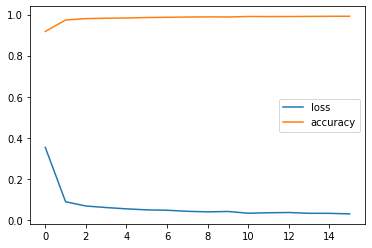

In [90]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'accuracy']].plot()

In [91]:
x_test = np.resize(x_test, (* x_test.shape[:3], 1))

In [92]:
pred = model.predict(x_test)

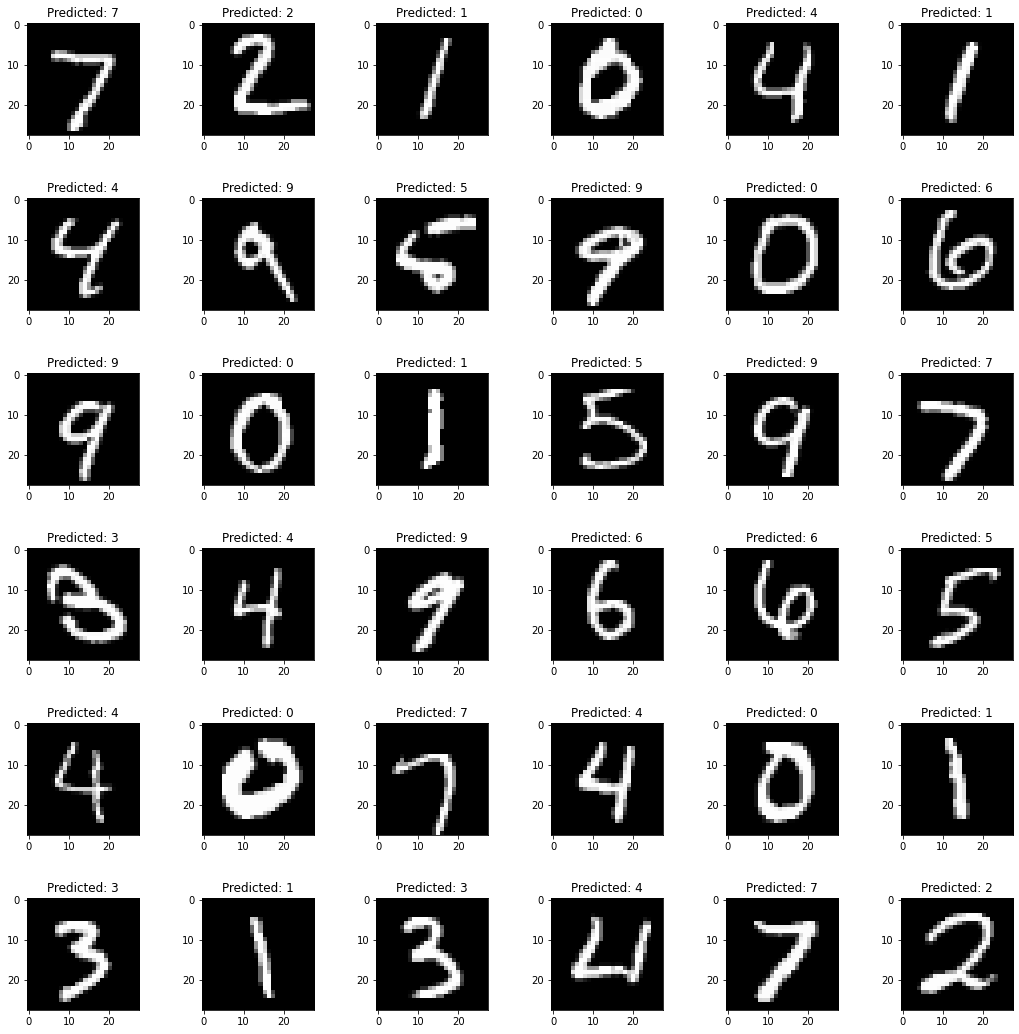

In [93]:
rows, cols = 6, 6
fig, axs = plt.subplots(rows, cols, figsize = (15, 15))
for i in range(rows):
    for j in  range(cols):
        axs[i][j].imshow(x_test[rows*i+j], cmap='gray')
        axs[i][j].set_title("Predicted: "+str(list(pred[rows*i + j]).index(max(list(pred[rows*i + j])))))
fig.tight_layout(pad=3.0)
plt.show()

In [94]:
def histogram(pred):
    xhist = []
    for item in range(10):
        for j in range(int(pred[item] * 100)):
            xhist.append(item)
    return xhist

def c(item):
    return [0 if i != item.index(max(item)) else 1 for i in item]

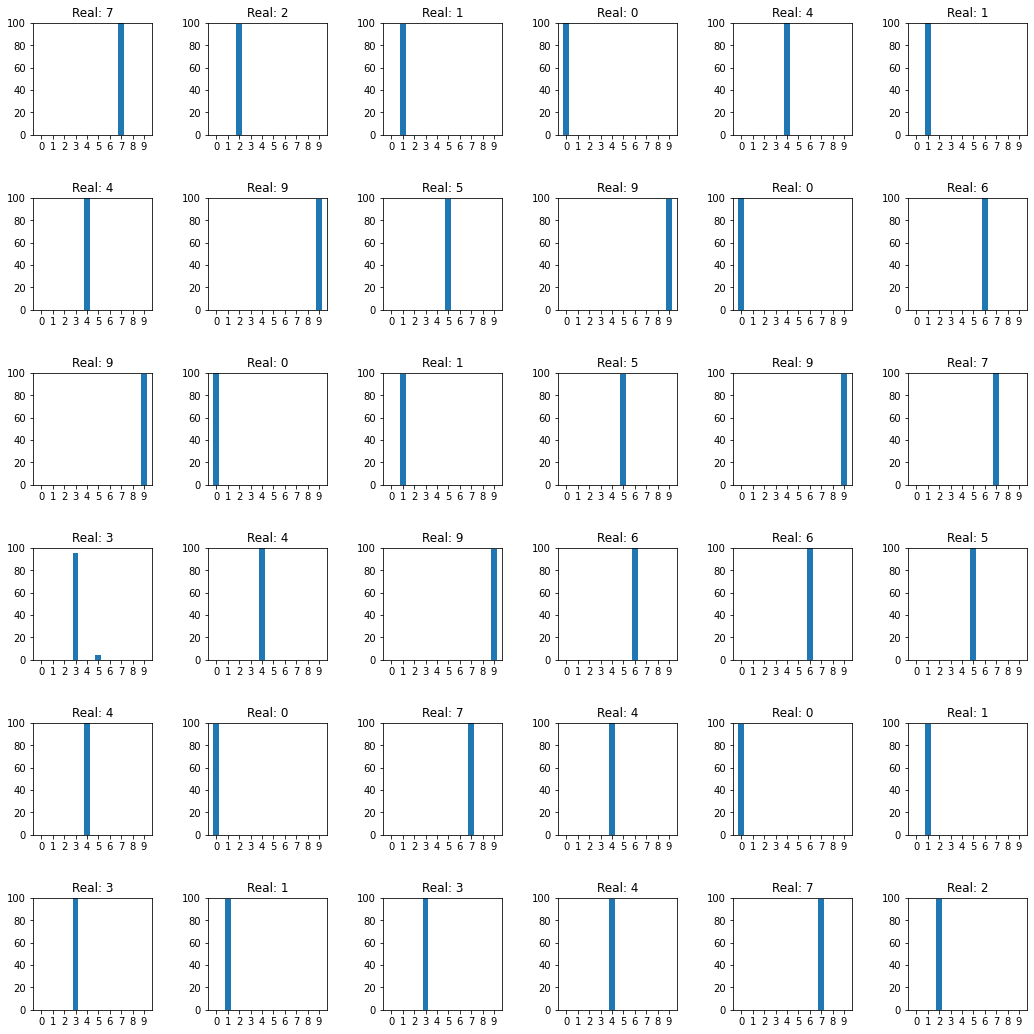

In [95]:
rows, cols = 6, 6
fig, axs = plt.subplots(rows, cols, figsize = (15, 15))
for i in range(rows):
    for j in range(cols):
        axs[i][j].hist(histogram(pred[rows*i + j]), bins = np.linspace(-0.25, 9.25, 20))
        axs[i][j].set_xticks(range(10))
        axs[i][j].set_ylim((0, 100))
        axs[i][j].set_title("Real: "+str(y_test[rows*i + j]))
fig.tight_layout(pad=3.0)
plt.show()

In [96]:
def setup(pred):
    return list(map(lambda x: list(x).index(np.max(x)), pred))

In [97]:
final_pred = setup(pred)

In [98]:
from sklearn.metrics import confusion_matrix
df_conf = pd.DataFrame(confusion_matrix(final_pred, y_test), columns = range(10))
df_conf

,0,1,2,3,4,5,6,7,8,9
0,974,0,0,0,0,2,7,0,1,2
1,0,1125,0,0,1,1,3,2,0,1
2,1,1,1026,1,0,0,1,5,1,0
3,0,3,1,1001,0,3,0,0,1,1
4,0,0,0,0,974,0,1,0,1,8
5,0,0,0,6,0,882,1,0,1,2
6,2,3,0,0,2,2,944,0,0,0
7,2,2,5,1,1,0,0,1020,0,6
8,1,1,0,1,1,1,1,0,969,3
9,0,0,0,0,3,1,0,1,0,986


In [102]:
from sklearn.metrics import classification_report
print(classification_report(final_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.99      0.99      0.99      1133
           2       0.99      0.99      0.99      1036
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       984
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       953
           7       0.99      0.98      0.99      1037
           8       0.99      0.99      0.99       978
           9       0.98      0.99      0.99       991

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [104]:
# test = test.to_numpy()
test = np.resize(test, (total, width, height))
test = np.resize(test, (*test.shape[:3], 1))

In [105]:
pred = model.predict(test)
final_pred = setup(pred)

In [106]:
output = pd.DataFrame(final_pred, columns=['Label']); output.index += 1; output.head()

,Label
1,2
2,0
3,9
4,0
5,3


In [107]:
final_pred[:5]

[2, 0, 9, 0, 3]

In [108]:
output.to_csv('final_output1.csv', index_label='ImageId')

In [109]:
final_output = pd.read_csv('final_output1.csv')

In [110]:
final_output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [111]:
final_output.shape

(28000, 2)